In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

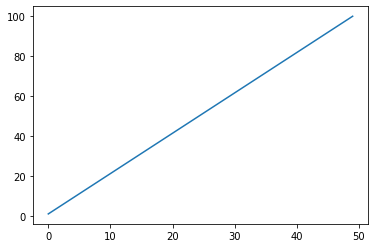

In [2]:
plt.plot(np.linspace(1,100));

In [86]:
import argparse
import pandas as pd

from influxdb import DataFrameClient

host='localhost'
port=8086

"""Instantiate the connection to the InfluxDB client."""
user = 'root'
password = 'root'
dbname = 'demo'
protocol = 'line'

client = DataFrameClient(host, port, user, password, dbname)

print("Create pandas DataFrame")
arr = np.transpose(np.array([np.linspace(1,30,30), np.linspace(1,30,30)]))
df = pd.DataFrame(data=arr,
                  index=pd.date_range(start='2014-11-16',
                                      periods=30, freq='H'), columns=['Temp', "Temp2"])

#display(df)
print("Create database: " + dbname)
client.create_database(dbname)

print("Write DataFrame")
#client.write_points(df, 'demo', protocol=protocol)

print("Write DataFrame with Tags")
client.write_points(df, 'some_measurement',
                    {'k1': 'lior', 'k2': 'segev'}, protocol=protocol, tag_columns = ['Temp2'] )

print("Read DataFrame")
result = client.query("select * from some_measurement")

print("Delete database: " + dbname)
#client.drop_database(dbname)



Create pandas DataFrame
Create database: demo
Write DataFrame
Write DataFrame with Tags
Read DataFrame
Delete database: demo


In [89]:
import paho.mqtt.client as mqtt

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("test")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("localhost", 1883, 60)

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()

Connected with result code 0
test b'something else number 1'


KeyboardInterrupt: 